
# Project: noshowappointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The noshowappointments-kagglev2-may-2016.csv is file consist of more than 100k data of persons who showed up or not for the appointment. It is a data brazil and also the data consist of number of respones in background(details) of a person.
> Here we gonna breakdown every datapoint based on which the person showed up for the appoinment, which is like based on gender, age, physically chanllenged, etc.


# Here we are using some of the comman python data analysis tools and packages.

In [61]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from matplotlib import style
sns.set()

In [2]:
# reading the csv file. And with parse_dates we are passing the columns as datetime values instead of standard forms as in file.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv',parse_dates=['ScheduledDay','AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# getting the number of rows & columns
df.shape

(110527, 14)

In [4]:
# getting the information about the dataset as what are the data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [5]:
# getting the description about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# from below codes by using category in astype(), we can reduce the memory, as we can see first of all data set was 
# of 11.8MB, but by using it in Neighbourhood it reduced to 11.1MB . 
df['Neighbourhood']=df['Neighbourhood'].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [8]:
# to reduce size
df['No-show']=df['No-show'].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [10]:
# to reduce size
df[['Scholarship','Hipertension','Diabetes','Alcoholism']]=df[['Scholarship','Hipertension','Diabetes','Alcoholism']].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  category           
 7   Scholarship     110527 non-null  category           
 8   Hipertension    110527 non-null  category           
 9   Diabetes        110527 non-null  category           
 10  Alcoholism      110527 non-null  category           
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Data Wrangling

In [12]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Here we are seeing some unsual thing which are as follows-
1. Some of the columns are misspelled
2. Age has enormous value like -1
3. Unused columns which are not much of use.


In [13]:
# gonna drop AppointmentID columns as it of not much use.
df.drop(['AppointmentID'],axis=1,inplace=True)

In [14]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
# changing the names of columns which have incorrect names or format
df.rename({'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},axis=1,inplace=True)

In [16]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [17]:
# As we can see threre is one person which showing inncorrect data for age as can't be in negative or zero.
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [18]:
# below code is for the negative age and zero, as we gonna take the mean of all ages, and put in place of negative & zero value
ambi_Age=df.loc[(df['Age']<0)]
ambi_Age

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
# dropping this ambigious age data from dataframe
df.drop(ambi_Age.index,axis=0,inplace=True)

In [20]:
# checking for ambigious data
df.loc[(df['Age']<0)]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [21]:
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [22]:
# managing the nO_show column as it is little bit confusing,as person showed for appointment it represent 'No' and for not
# showed it represent the "Yes"
# So here converting No to 1 and Yes to 0
df['No_show'].replace({'No':1,'Yes':0},inplace=True)

In [23]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [24]:
# calculation of unique patientID
df.PatientId.nunique()

62298

In [25]:
# duplicated patientID
df.PatientId.duplicated().sum()

48228

<a id='eda'></a>
## Exploratory Data Analysis

> In the above section we build a dataset according to our usage, which will help us out in below sections.
This will allow to ask some meaningfull questions.

### Research Question 1 (What is overall gender applied for appoinment and out of that how many showed up)

In [26]:
#finding the total numbers of male and female.
(df['Gender']=='M').value_counts()

False    71839
True     38687
Name: Gender, dtype: int64

In [27]:
# out of total there is 36869 Male & 73658 are female

In [28]:
df_Male=df[(df['Gender']=='M') & (df['No_show']==1)]
df_Male.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
13,9.113946e+14,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,1


In [29]:
df_Female=df[(df['Gender']=='F') & (df['No_show']==1)]
df_Female.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1


In [30]:
a=len(df_Male)
a

30962

In [79]:
total_male=df[df['Gender']=='M']
len(total_male)

38687

In [80]:
#percentage of male showed up with total male
(a/len(total_male))*100

80.03205211052808

In [31]:
b=len(df_Female)
b

57245

In [81]:
total_female=df[df['Gender']=='F']
len(total_female)

71839

In [82]:
#percentage of female who showed up by total female
(b/len(total_female))*100

79.68512924734476

In [32]:
c=a+b
c

88207

In [83]:
#overall ratio of female showed & ratio of male showed up-
b/c , a/c

(0.6489847744510073, 0.3510152255489927)

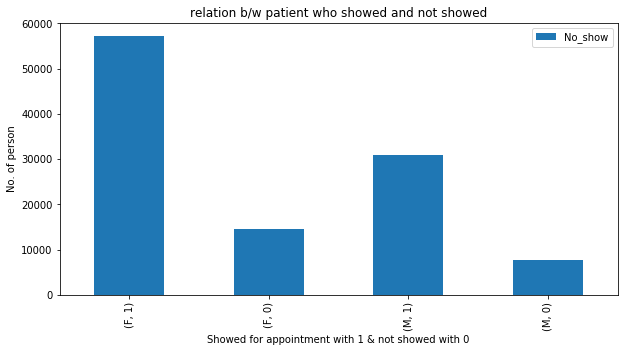

In [34]:
df.groupby('Gender')['No_show'].value_counts().plot(kind='bar',figsize=(10,5));
plt.xlabel('Showed for appointment with 1 & not showed with 0')
plt.ylabel('No. of person')
plt.title('relation b/w patient who showed and not showed')
plt.legend()

From the above analysis we can say that the female ratio is more than men ratio who showed up, but the percentage wise the male showed up more than female.

### Research Question 2  (Realtionship with scholarship/hypertension/age who showed & not showed)

# 1. Relationship with scholarship & who showed & not

In [35]:
#1. Total person reciving scholarship
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

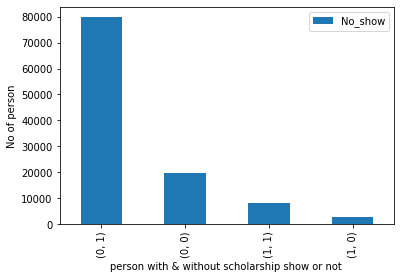

In [92]:
# here 0,1 define for not reciving scholarship but showed,0,0 defines for not reciving scholarship & not showed up, 
# 1,1 define for person reciving scholarship & showed up, 1,0 defines for recived scholarship but not showed up.
df.groupby('Scholarship')['No_show'].value_counts().plot(kind='bar');
plt.xlabel('person with & without scholarship show or not ')
plt.ylabel('No of person')
plt.legend()

From the above analysis, it can't be sure that the person reciving scholarship showed or not.

# 2. Relationship b/w hypertension & who showed & not showed

In [47]:
df['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

In [51]:
# person who has hypertension showed up
len(df[(df['Hypertension']==1) & (df['No_show']==1)])

#so, the above code suggest that the person who has hypertension frequently showed up, i.e, out of 21801, 18029 showed up.

18029

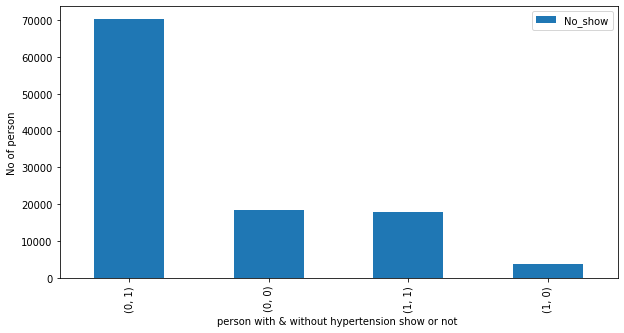

In [54]:
# here 0,1 define for person not having hypertension but showed, 0,0 defines for not having hypertension & not showed up, 
# 1,1 define for person having hypertension & showed up, 1,0 defines for having hypertension but not showed up.
df.groupby('Hypertension')['No_show'].value_counts().plot(kind='bar',figsize=(10,5));
plt.xlabel('person with & without hypertension show or not ')
plt.ylabel('No of person')
plt.legend()

From the above analysis, we can say that the person who has hypertension issue, showed for appointment.

# 3. Relationship b/w age & who showed up or not

In [55]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [64]:
# This function combines the matplotlib hist function
def h_data(data,colors):
    total=data.values
    sns.distplot(data, color=colors);

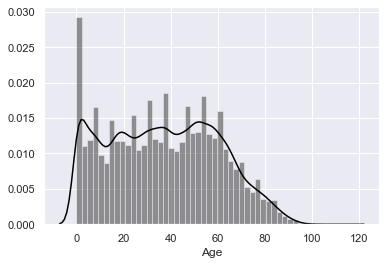

In [66]:
h_data(df.Age,"black")

In [68]:
# dviding the ages into groups
bins=[0,18,40,70,100]
labels=['child','adult','elder','old']
age_groups=pd.cut(df.Age, bins,right=False,labels=labels)
df['Age_group']=age_groups

In [69]:
group_count=df.Age_group.value_counts()
group_count

elder    41948
adult    31902
child    27379
old       9286
Name: Age_group, dtype: int64

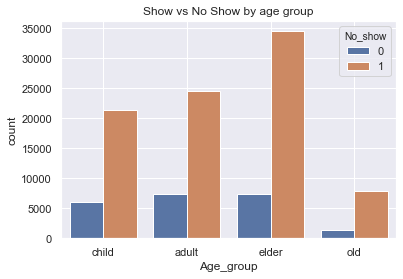

In [74]:
# plot for who showed up and not according to age group
ln=sns.countplot(x=df.Age_group, hue=df.No_show, data=df)
ln.set_title('Show vs No Show by age group')
plt.grid(True)
plt.show()

From the above data analysis on age we can say that the person who is in elder segemnt, showed more than any other age group person.

<a id='conclusions'></a>
## Conclusions

> There are certain age group who showed up more
> The scholarship also create some sort dilusion that if person reciving it not showed more as compae to person reciving but showed up.
> The gender also making an impact as by ratio female showed up more out of total, but in percentage wise the male showed more out of total male.
> Also the person having hypertension showed more as compared to person having hypertension but not showed up.

>So, the final conclusion is that, there is not enough data to decide that the person showed up or not and the reason.

it will assess the value

In [ ]:
from subprocess import call
call[()]